In [2]:
import pandas as pd

Traitement initial des données
Le dataset en .csv est trop lourd pour github on le convertit donc en parquet qui est plus léger

https://data.nantesmetropole.fr/explore/dataset/244400404_capteurs-ondes-electomagnetiques-nantes-metropole/information/?disjunctive.name&disjunctive.address&sort=extractjson_date&dataChart=eyJxdWVyaWVzIjpbeyJjaGFydHMiOlt7InR5cGUiOiJsaW5lIiwiZnVuYyI6IkFWRyIsInlBeGlzIjoiZXh0cmFjdGpzb25fdmFsdWUiLCJzY2llbnRpZmljRGlzcGxheSI6dHJ1ZSwiY29sb3IiOiJyYW5nZS1jdXN0b20ifV0sInhBeGlzIjoiZXh0cmFjdGpzb25fZGF0ZSIsIm1heHBvaW50cyI6bnVsbCwidGltZXNjYWxlIjoiaG91ciIsInNvcnQiOiIiLCJzZXJpZXNCcmVha2Rvd24iOiJuYW1lIiwic3RhY2tlZCI6IiIsImNvbmZpZyI6eyJkYXRhc2V0IjoiMjQ0NDAwNDA0X2NhcHRldXJzLW9uZGVzLWVsZWN0b21hZ25ldGlxdWVzLW5hbnRlcy1tZXRyb3BvbGUiLCJvcHRpb25zIjp7ImRpc2p1bmN0aXZlLm5hbWUiOnRydWUsImRpc2p1bmN0aXZlLmFkZHJlc3MiOnRydWUsInNvcnQiOiJleHRyYWN0anNvbl9kYXRlIn19fV0sImRpc3BsYXlMZWdlbmQiOnRydWUsImFsaWduTW9udGgiOnRydWV9

In [2]:
#Le dataset est dans le .zip
df = pd.read_csv("C:/Users/owenn/Downloads/Data_set.csv", sep=";")

In [3]:
df.to_parquet("Data_set.parquet", index=False)

In [3]:
df = pd.read_parquet("Data_set.parquet")

In [4]:
df.head()

,Identifiant,Nom du capteur,Statut,Date du relevé,Valeur relevée (V/m),Date de dernière mise à jour,Valeur du dernier relevé (V/m),Adresse,Image du capteur,geolocalisation,derniere_maj,isover,diffdateprocess
0,929951bd-5657-485f-9dac-f5e5aba2dcc0,Nantes_46,ONLINE,2022-01-16T19:06:09+01:00,1.02,2022-02-23T11:06:09+01:00,1.01,"Impasse des Forgerons,44640 Saint-Jean-de-Bois...",https://storage.googleapis.com/odo-prod-sites/...,"47.18541, -1.720456",non,0,25557
1,929951bd-5657-485f-9dac-f5e5aba2dcc0,Nantes_46,ONLINE,2022-01-17T03:06:10+01:00,0.95,2022-02-23T11:06:09+01:00,1.01,"Impasse des Forgerons,44640 Saint-Jean-de-Bois...",https://storage.googleapis.com/odo-prod-sites/...,"47.18541, -1.720456",non,0,25549
2,929951bd-5657-485f-9dac-f5e5aba2dcc0,Nantes_46,ONLINE,2022-01-18T19:06:10+01:00,0.99,2022-02-23T11:06:09+01:00,1.01,"Impasse des Forgerons,44640 Saint-Jean-de-Bois...",https://storage.googleapis.com/odo-prod-sites/...,"47.18541, -1.720456",non,0,25509
3,929951bd-5657-485f-9dac-f5e5aba2dcc0,Nantes_46,ONLINE,2022-01-19T19:06:08+01:00,1.03,2022-02-23T11:06:09+01:00,1.01,"Impasse des Forgerons,44640 Saint-Jean-de-Bois...",https://storage.googleapis.com/odo-prod-sites/...,"47.18541, -1.720456",non,0,25485
4,929951bd-5657-485f-9dac-f5e5aba2dcc0,Nantes_46,ONLINE,2022-01-20T05:06:10+01:00,0.98,2022-02-23T11:06:09+01:00,1.01,"Impasse des Forgerons,44640 Saint-Jean-de-Bois...",https://storage.googleapis.com/odo-prod-sites/...,"47.18541, -1.720456",non,0,25475


Interpretation des colonnes:
- Identifiant: une série de chiffres et lettres uniques liés au capteur utilisé
- Nom: le nom du capteur
- Statut: le statut du capteur (en service, hors service, ...)
- Date du relevé: la date du relevé format (AAAA-MM-JJ HH:MM:SS)
- Valeur: la valeur du relevé
- Date de la derniière Màj
- Valeur du dernier relevé : relevé précédent
- Adresse: l'adresse du capteur
- Image : une image du capteur
- Geolocalisation : les coordonnées du capteur
- Dernière_maj: Si le capteur a été mis à jour
- Isover : Si le capteur est en surcharge
- Diffdateprocess : différence entre la date de relevé et la date de mise à jour

In [5]:
#On split la colonne geolocalisation en deux colonnes X et Y
df[['X', 'Y']] = df['geolocalisation'].str.split(', ', n=1, expand=True)
df.head()

,Identifiant,Nom du capteur,Statut,Date du relevé,Valeur relevée (V/m),Date de dernière mise à jour,Valeur du dernier relevé (V/m),Adresse,Image du capteur,geolocalisation,derniere_maj,isover,diffdateprocess,X,Y
0,929951bd-5657-485f-9dac-f5e5aba2dcc0,Nantes_46,ONLINE,2022-01-16T19:06:09+01:00,1.02,2022-02-23T11:06:09+01:00,1.01,"Impasse des Forgerons,44640 Saint-Jean-de-Bois...",https://storage.googleapis.com/odo-prod-sites/...,"47.18541, -1.720456",non,0,25557,47.18541,-1.720456
1,929951bd-5657-485f-9dac-f5e5aba2dcc0,Nantes_46,ONLINE,2022-01-17T03:06:10+01:00,0.95,2022-02-23T11:06:09+01:00,1.01,"Impasse des Forgerons,44640 Saint-Jean-de-Bois...",https://storage.googleapis.com/odo-prod-sites/...,"47.18541, -1.720456",non,0,25549,47.18541,-1.720456
2,929951bd-5657-485f-9dac-f5e5aba2dcc0,Nantes_46,ONLINE,2022-01-18T19:06:10+01:00,0.99,2022-02-23T11:06:09+01:00,1.01,"Impasse des Forgerons,44640 Saint-Jean-de-Bois...",https://storage.googleapis.com/odo-prod-sites/...,"47.18541, -1.720456",non,0,25509,47.18541,-1.720456
3,929951bd-5657-485f-9dac-f5e5aba2dcc0,Nantes_46,ONLINE,2022-01-19T19:06:08+01:00,1.03,2022-02-23T11:06:09+01:00,1.01,"Impasse des Forgerons,44640 Saint-Jean-de-Bois...",https://storage.googleapis.com/odo-prod-sites/...,"47.18541, -1.720456",non,0,25485,47.18541,-1.720456
4,929951bd-5657-485f-9dac-f5e5aba2dcc0,Nantes_46,ONLINE,2022-01-20T05:06:10+01:00,0.98,2022-02-23T11:06:09+01:00,1.01,"Impasse des Forgerons,44640 Saint-Jean-de-Bois...",https://storage.googleapis.com/odo-prod-sites/...,"47.18541, -1.720456",non,0,25475,47.18541,-1.720456


In [6]:
#On drop les colonnes inutiles

df = df.drop(columns=['geolocalisation','Valeur du dernier relevé (V/m)','Identifiant','Statut','Nom du capteur','Date de dernière mise à jour','Adresse','Image du capteur','derniere_maj','isover','diffdateprocess'])
df.head()

,Date du relevé,Valeur relevée (V/m),X,Y
0,2022-01-16T19:06:09+01:00,1.02,47.18541,-1.720456
1,2022-01-17T03:06:10+01:00,0.95,47.18541,-1.720456
2,2022-01-18T19:06:10+01:00,0.99,47.18541,-1.720456
3,2022-01-19T19:06:08+01:00,1.03,47.18541,-1.720456
4,2022-01-20T05:06:10+01:00,0.98,47.18541,-1.720456


In [7]:
#On transforme les colonnes X et Y en float
df['X'] = df['X'].str.replace(',','.')
df['Y'] = df['Y'].str.replace(',','.')

df['Y'] = df['Y'].astype(float)
df['X'] = df['X'].astype(float)

#On transforme la collonne date du relevé en datetime
df['Date du relevé'] = pd.to_datetime(df['Date du relevé'])
df.head()

C:\Users\marec\AppData\Local\Temp\ipykernel_12560\2634270546.py:9: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['Date du relevé'] = pd.to_datetime(df['Date du relevé'])


,Date du relevé,Valeur relevée (V/m),X,Y
0,2022-01-16 19:06:09+01:00,1.02,47.18541,-1.720456
1,2022-01-17 03:06:10+01:00,0.95,47.18541,-1.720456
2,2022-01-18 19:06:10+01:00,0.99,47.18541,-1.720456
3,2022-01-19 19:06:08+01:00,1.03,47.18541,-1.720456
4,2022-01-20 05:06:10+01:00,0.98,47.18541,-1.720456


In [8]:
#Trions les données par date
df = df.sort_values(by='Date du relevé')
df.head()

,Date du relevé,Valeur relevée (V/m),X,Y
306325,2020-03-04 01:06:09+01:00,1.93,47.208418,-1.574232
385183,2020-03-04 01:06:10+01:00,2.55,47.211599,-1.558970
6340,2020-03-04 01:06:12+01:00,1.12,47.206345,-1.541389
92691,2020-03-04 03:06:10+01:00,1.77,47.208418,-1.574232
728124,2020-03-04 03:06:10+01:00,1.80,47.211599,-1.558970


In [9]:
#on verfie que Valeur du relevé est bien un float
df['Valeur relevée (V/m)'] = df['Valeur relevée (V/m)'].astype(float)
df.head()

,Date du relevé,Valeur relevée (V/m),X,Y
306325,2020-03-04 01:06:09+01:00,1.93,47.208418,-1.574232
385183,2020-03-04 01:06:10+01:00,2.55,47.211599,-1.558970
6340,2020-03-04 01:06:12+01:00,1.12,47.206345,-1.541389
92691,2020-03-04 03:06:10+01:00,1.77,47.208418,-1.574232
728124,2020-03-04 03:06:10+01:00,1.80,47.211599,-1.558970


In [10]:
#On sauvergade le jeu de données
df.to_parquet("comp.parquet", index=False)

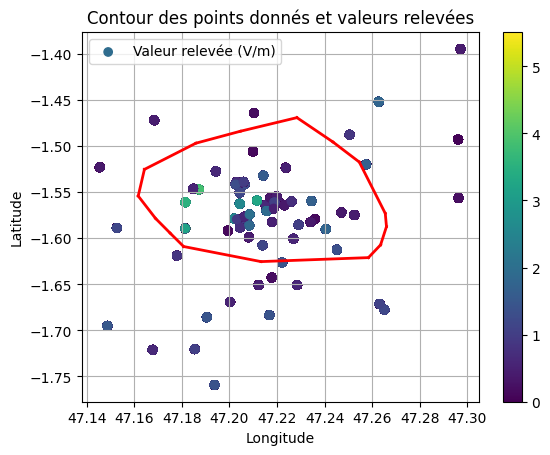

In [11]:
#On trace les données en fonction de X et Y on instaure une couleur en fonction de la valeur du relevé
from scipy.spatial import ConvexHull
import matplotlib.pyplot as plt
import numpy as np

# Coordonnées
Y_nantes = [47.26207237693615, 47.26603839034966, 47.263564975387254, 47.25844406725748,
     47.225497620211236, 47.21325915452311, 47.20008968236988, 47.18072711288377,
     47.17513388626106, 47.16892091756998, 47.1616235603801, 47.164233502644635,
     47.18587971114895, 47.20457815934575, 47.22837258535146, 47.24350102944418,
     47.25460728678873, 47.25906700474962, 47.265534980666274]

X_nantes = [-1.5835580484642375, -1.587312999949284, -1.607131554651009, -1.621020333662162,
     -1.6212480185639744, -1.6253463467967766, -1.6176050601348169, -1.6089530338655678,
     -1.59460888505077, -1.5784432570213935, -1.5540809725264126, -1.5251649899949848,
     -1.4967043772672017, -1.483726337863338, -1.4689268192448957, -1.4953382678562677,
     -1.5171960184311928, -1.554991712133662, -1.5729788193776173]

# Conversion en tableau numpy
points = np.column_stack((X_nantes, Y_nantes))

# Calcul de l'enveloppe convexe
hull = ConvexHull(points)

# Tracé

for simplex in hull.simplices:
    plt.plot(points[simplex, 1], points[simplex, 0], 'r-', lw=2)

# Ajout du scatter plot
plt.scatter(df['X'], df['Y'], c=df['Valeur relevée (V/m)'], cmap='viridis', label="Valeur relevée (V/m)")
#On rajoute une gardient de couloir en fonction de la valeur relevée
plt.colorbar()

plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Contour des points donnés et valeurs relevées")
plt.legend()
plt.grid()
plt.show()

# Gaussian Mixtures

In [47]:
#On va fare une classification des valeurs relevées par mixture gaussiene
#Algortihme EM

from sklearn.mixture import GaussianMixture

C = df[['X','Y','Valeur relevée (V/m)']]
gmm = GaussianMixture(n_components=6)
gmm.fit(C)
labels = gmm.predict(C)


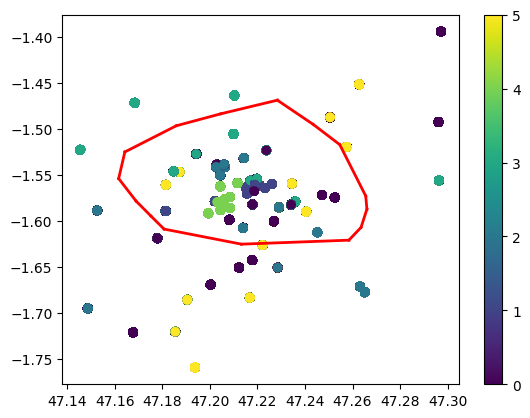

In [48]:
# Coordonnées
Y_nantes = [47.26207237693615, 47.26603839034966, 47.263564975387254, 47.25844406725748,
     47.225497620211236, 47.21325915452311, 47.20008968236988, 47.18072711288377,
     47.17513388626106, 47.16892091756998, 47.1616235603801, 47.164233502644635,
     47.18587971114895, 47.20457815934575, 47.22837258535146, 47.24350102944418,
     47.25460728678873, 47.25906700474962, 47.265534980666274]

X_nantes = [-1.5835580484642375, -1.587312999949284, -1.607131554651009, -1.621020333662162,
     -1.6212480185639744, -1.6253463467967766, -1.6176050601348169, -1.6089530338655678,
     -1.59460888505077, -1.5784432570213935, -1.5540809725264126, -1.5251649899949848,
     -1.4967043772672017, -1.483726337863338, -1.4689268192448957, -1.4953382678562677,
     -1.5171960184311928, -1.554991712133662, -1.5729788193776173]

# Conversion en tableau numpy
points = np.column_stack((X_nantes, Y_nantes))

# Calcul de l'enveloppe convexe
hull = ConvexHull(points)

# Tracé

for simplex in hull.simplices:
    plt.plot(points[simplex, 1], points[simplex, 0], 'r-', lw=2)

plt.scatter(df['X'], df['Y'], c=labels, cmap='viridis')
plt.colorbar()

In [14]:
gmm.means_

array([[47.22405201, -1.51557802],
       [47.21076607, -1.66917396],
       [47.213622  , -1.56401341]])

In [15]:
# On va implémenter l'algorithme EM pour la classification des valeurs relevées
from sklearn.mixture import GaussianMixture
from scipy.stats import multivariate_normal
from numpy import random as rd
rd.seed(42)

# Initialisation
C = df[['X','Y']]
# On remplace les NaN et inf
C = C.fillna(C.mean())
C = C.replace([np.inf, -np.inf], C.mean())
C = C.to_numpy()

max_iter = 100
n_components = 3
n_samples = len(C)
n_features = 2

# On initialise les centres des clusters aléatoirement
Xmax = np.max(df['X'].to_numpy())
Xmin = np.min(df['X'].to_numpy())
Ymax = np.max(df['Y'].to_numpy())
Ymin = np.min(df['Y'].to_numpy())
means = rd.rand(n_components,n_features)
means[:,0] = means[:,0]*(Xmax-Xmin) + Xmin
means[:,1] = means[:,1]*(Ymax-Ymin) + Ymin

covariances = np.array([np.eye(n_features)] * n_components)
weights = np.ones(n_components)/n_components
responsibilities = np.zeros((n_samples,n_components))
log_likelihoods = []

In [16]:
multivariate_normal.pdf(C, means[0], covariances[0])

array([0.15707814, 0.1574447 , 0.15783244, ..., 0.15164774, 0.15660817,
       0.1574447 ], shape=(740255,))

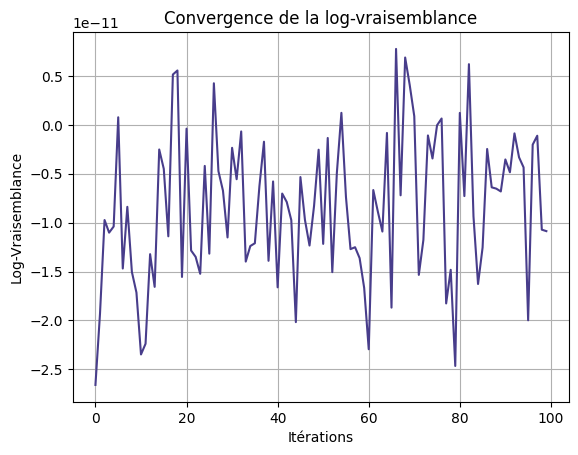

In [17]:
for i in range(max_iter):
    # Expectation: calcul des responsabilités
    for k in range(n_components):
        responsibilities[:,k] = weights[k] * multivariate_normal.pdf(C, mean=means[k], cov=covariances[k])
    responsibilities /= responsibilities.sum(axis=1,keepdims=True)
    
    # Maximization: mise à jour des paramètres
    Nk = responsibilities.sum(axis=0)
    weights = Nk / n_samples
    means = (responsibilities.T @ C) / Nk[:,None]
    
    for k in range(n_components):
        diff = C-means[k]
        covariances[k] = (responsibilities[:,k][:,None]*diff).T @ diff / Nk[k]

    log_likelihood = np.sum(np.log(np.sum(responsibilities,axis=1)))
    log_likelihoods.append(log_likelihood)

plt.plot(log_likelihoods, color='darkslateblue')
plt.xlabel("Itérations")
plt.ylabel("Log-Vraisemblance")
plt.title("Convergence de la log-vraisemblance")
plt.grid()
plt.show()

Centre des clusters: [[47.20355809 -1.56323343]
 [47.23036256 -1.59836973]
 [47.21035091 -1.56061207]]


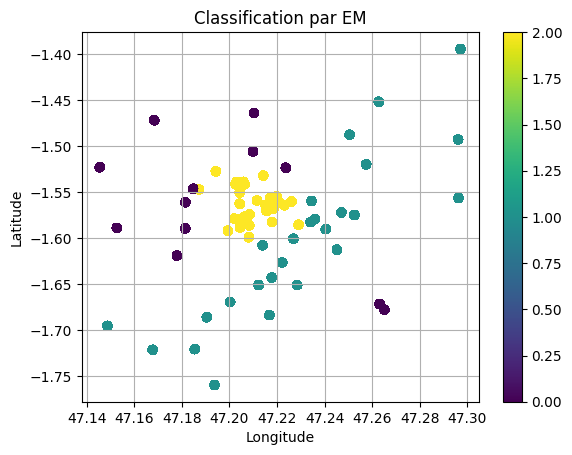

In [18]:
# On va maintenant afficher les clusters
print(f'Centre des clusters: {means}')
plt.scatter(C[:,0], C[:,1], c=np.argmax(responsibilities,axis=1), cmap='viridis')
plt.colorbar()
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Classification par EM")
plt.grid()
plt.show()

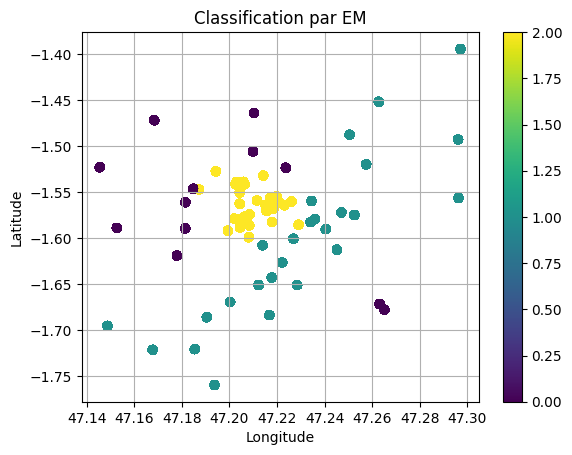

In [19]:
# Prédiction avec la probabilité conditionnelle
probas = np.zeros((n_samples, n_components))
for j in range(n_components):
    probas[:,j] = weights[j] * multivariate_normal.pdf(C, means[j], covariances[j])
predicted_labels = np.argmax(probas,axis=1)
plt.scatter(C[:,0], C[:,1], c=predicted_labels, cmap='viridis')
plt.colorbar()
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title('Classification par EM')
plt.grid()
plt.show()

In [25]:
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, davies_bouldin_score

#Normaliser les données
def preprocess_data(df, features):
    """
    Sélectionne les features et normalise les données.
    """
    scaler = StandardScaler()
    X = df[features].values
    X_scaled = scaler.fit_transform(X)
    return X_scaled, scaler

# Fonction pour rechercher le nombre optimal de composantes en utilisant le critère BIC
def select_optimal_components(X, max_components=10):
    bics = []
    gmms = []
    for n in range(1, max_components + 1):
        gmm = GaussianMixture(n_components=n, covariance_type='full', random_state=42)
        gmm.fit(X)
        bics.append(gmm.bic(X))
        gmms.append(gmm)
    optimal_n = np.argmin(bics) + 1
    print(f"Nombre optimal de composantes selon BIC : {optimal_n}")
    
    # Visualisation du BIC en fonction du nombre de composantes
    plt.figure(figsize=(8, 4))
    plt.plot(range(1, max_components + 1), bics, marker='o')
    plt.xlabel("Nombre de composantes")
    plt.ylabel("BIC")
    plt.title("Sélection du modèle via BIC")
    plt.show()
    
    return gmms[optimal_n - 1]

# Fonction pour visualiser les clusters avec leurs ellipses de confiance
def plot_gmm_results(X, gmm, scaler=None, title="Clustering GMM"):
    labels = gmm.predict(X)
    plt.figure(figsize=(8, 6))
    plt.scatter(X[:, 0], X[:, 1], c=labels, s=30, cmap='viridis', alpha=0.6)
    
    # Tracer les ellipses pour chaque composante
    ax = plt.gca()
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ellipse(pos, covar, ax, alpha=w)
    
    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

def draw_ellipse(position, covariance, ax, **kwargs):
    from matplotlib.patches import Ellipse
    if covariance.shape == (2, 2):
        # Calculer les valeurs propres et l'angle d'orientation
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        width, height = 2 * np.sqrt(covariance), 2 * np.sqrt(covariance)
        angle = 0
    for nsig in range(1, 4):  # 1, 2, 3 sigma
        ell = Ellipse(xy=position, width=nsig * width, height=nsig * height, angle=angle, **kwargs)
        ell.set_edgecolor('red')
        ell.set_facecolor('none')
        ax.add_patch(ell)

# Fonction pour évaluer la qualité du clustering
def evaluate_clustering(X, gmm):
    labels = gmm.predict(X)
    sil_score = silhouette_score(X, labels)
    db_score = davies_bouldin_score(X, labels)
    print(f"Score Silhouette: {sil_score:.3f}")
    print(f"Score Davies-Bouldin: {db_score:.3f}")
    return sil_score, db_score

Nombre optimal de composantes selon BIC : 6


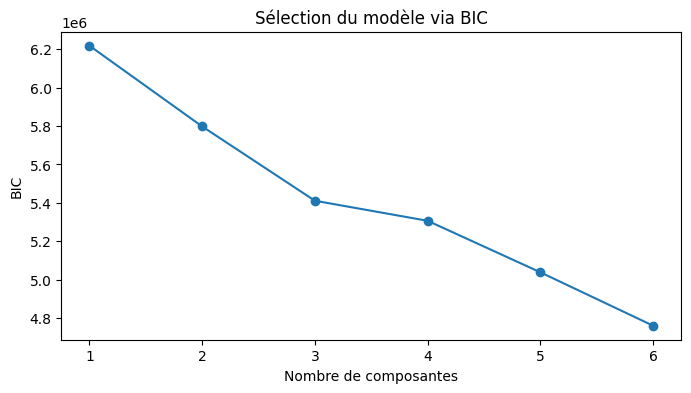

C:\Users\marec\AppData\Local\Temp\ipykernel_12560\127836269.py:62: RuntimeWarning: invalid value encountered in sqrt
  width, height = 2 * np.sqrt(covariance), 2 * np.sqrt(covariance)


ValueError: setting an array element with a sequence.

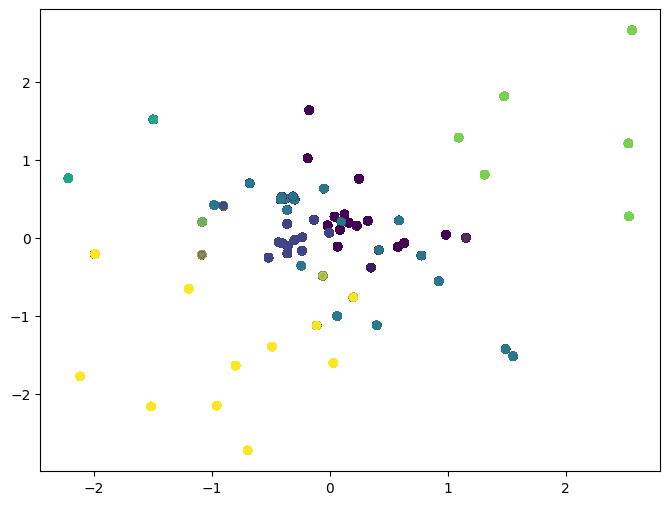

In [43]:
features = ['X', 'Y', 'Valeur relevée (V/m)']  
X_scaled, scaler = preprocess_data(df, features)

# Recherche du nombre optimal de composantes
gmm_optimal = select_optimal_components(X_scaled, max_components=6)

# Visualisation des clusters
plot_gmm_results(X_scaled, gmm_optimal, scaler=scaler, title="Résultats GMM après normalisation")

# Évaluation du clustering
evaluate_clustering(X_scaled, gmm_optimal)

Nombre optimal de composantes selon ICL : 10


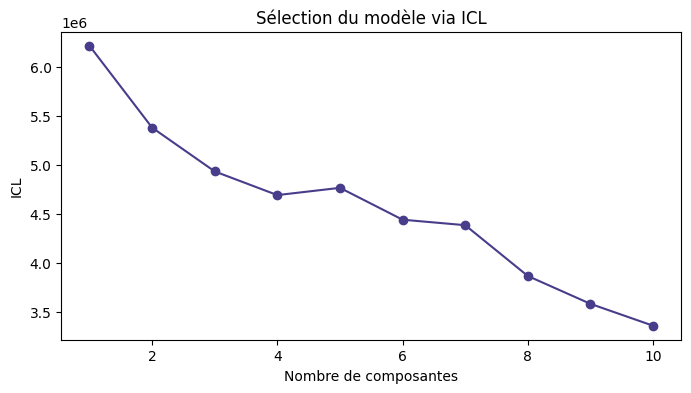

In [31]:
def select_optimal_components_ICL(X, max_components=10):
    icls = []
    gmms = []
    
    for n in range(1, max_components + 1):
        gmm = GaussianMixture(n_components=n, covariance_type='full', random_state=42)
        gmm.fit(X)
        bic = gmm.bic(X)
        responsibilities = gmm.predict_proba(X)
        # Calcul du terme d'entropie : on ajoute une petite constante pour éviter log(0)
        entropy = -np.sum(responsibilities * np.log(responsibilities + 1e-10))
        icl = bic - 2 * entropy
        icls.append(icl)
        gmms.append(gmm)
    
    optimal_n = np.argmin(icls) + 1
    print(f"Nombre optimal de composantes selon ICL : {optimal_n}")
    
    plt.figure(figsize=(8, 4))
    plt.plot(range(1, max_components + 1), icls, marker='o', color='darkslateblue')
    plt.xlabel("Nombre de composantes")
    plt.ylabel("ICL")
    plt.title("Sélection du modèle via ICL")
    plt.show()
    
    return gmms[optimal_n - 1]


#Exemple d'utilisation
gmm_optimal_icl = select_optimal_components_ICL(X_scaled, max_components=10)

c:\Users\marec\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\mixture\_base.py:269: ConvergenceWarning: Best performing initialization did not converge. Try different init parameters, or increase max_iter, tol, or check for degenerate data.
  warnings.warn(
c:\Users\marec\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\mixture\_base.py:269: ConvergenceWarning: Best performing initialization did not converge. Try different init parameters, or increase max_iter, tol, or check for degenerate data.
  warnings.warn(
c:\Users\marec\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\mixture\_base.py:269: ConvergenceWarning: Best performing initialization did not converge. Try different init parameters, or increase max_iter, tol, or check for degenerate data.
  warnings.warn(
c:\Users\marec\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\mixture\_base.py:269: ConvergenceWarning: Best performing initialization did not converg

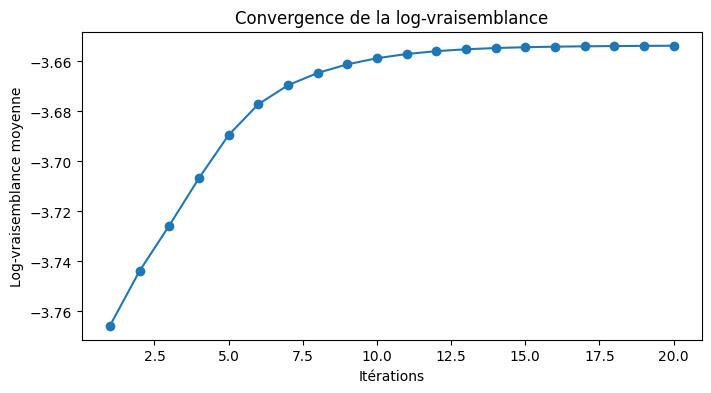

In [42]:
def plot_log_likelihood(X, n_components=3, covariance_type='full', max_iter=100):
    gmm = GaussianMixture(n_components=n_components, covariance_type=covariance_type,
                          max_iter=1, warm_start=True, random_state=42)
    log_likelihood = []
    
    for i in range(max_iter):
        gmm.fit(X)
        log_likelihood.append(gmm.score(X))
    
    plt.figure(figsize=(8,4))
    plt.plot(range(1, max_iter+1), log_likelihood, marker='o')
    plt.xlabel("Itérations")
    plt.ylabel("Log-vraisemblance moyenne")
    plt.title("Convergence de la log-vraisemblance")
    plt.show()
    
    return gmm

# Exemple d'utilisation :
gmm_final = plot_log_likelihood(X_scaled, n_components=3, covariance_type='full', max_iter=20)

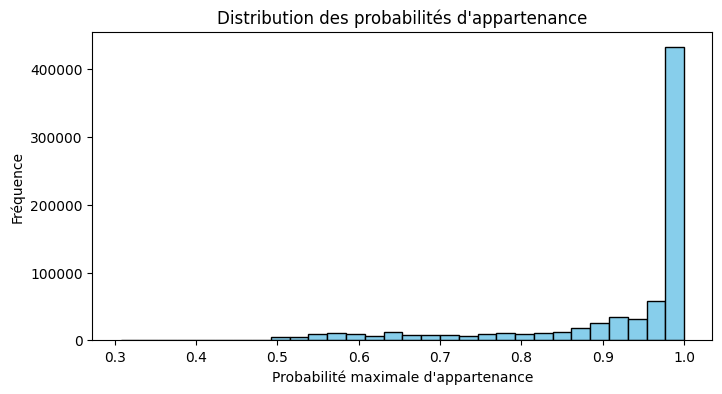

In [44]:
def plot_probability_histogram(X, gmm):
    # Probabilités d'appartenance pour chaque point
    probas = gmm.predict_proba(X)
    max_probas = probas.max(axis=1)
    
    plt.figure(figsize=(8,4))
    plt.hist(max_probas, bins=30, color='skyblue', edgecolor='black')
    plt.xlabel("Probabilité maximale d'appartenance")
    plt.ylabel("Fréquence")
    plt.title("Distribution des probabilités d'appartenance")
    plt.show()

# Exemple d'utilisation :
plot_probability_histogram(X_scaled, gmm_optimal)

Validation croisée

In [30]:
def bootstrap_gmm_validation(X, n_components, n_bootstrap=10, sample_fraction=0.8):
    silhouette_scores = []
    n_samples = X.shape[0]
    
    for i in range(n_bootstrap):
        # Tirage d'un échantillon (bootstrap) sans remise
        indices = np.random.choice(n_samples, int(sample_fraction * n_samples), replace=False)
        X_sample = X[indices]
        
        # Ajustement du GMM sur l'échantillon
        gmm = GaussianMixture(n_components=n_components, covariance_type='full', random_state=42)
        gmm.fit(X_sample)
        labels = gmm.predict(X_sample)
        
        # Calcul du score silhouette (si plus d'un cluster)
        if len(np.unique(labels)) > 1:
            score = silhouette_score(X_sample, labels)
            silhouette_scores.append(score)
            print(f"Bootstrap {i+1}/{n_bootstrap} - Silhouette score: {score:.3f}")
        else:
            print(f"Bootstrap {i+1}/{n_bootstrap} - Un seul cluster obtenu")
    
    print(f"\nScore silhouette moyen sur {n_bootstrap} itérations: {np.mean(silhouette_scores):.3f} ± {np.std(silhouette_scores):.3f}")
    return silhouette_scores

# Exemple d'utilisation :
bootstrap_scores = bootstrap_gmm_validation(X_scaled, n_components=3, n_bootstrap=10, sample_fraction=0.8)

KeyboardInterrupt: 

Comparaison avec K-means 

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

def clustering_comparison(X, n_components=5):
    clustering_results = {}
    
    # GMM
    gmm = GaussianMixture(n_components=n_components, covariance_type='full', random_state=42)
    gmm.fit(X)
    labels_gmm = gmm.predict(X)
    silhouette_gmm = silhouette_score(X, labels_gmm) if len(np.unique(labels_gmm)) > 1 else -1
    clustering_results['GMM'] = (labels_gmm, silhouette_gmm)
    
    # KMeans
    kmeans = KMeans(n_clusters=n_components, random_state=42)
    labels_kmeans = kmeans.fit_predict(X)
    silhouette_kmeans = silhouette_score(X, labels_kmeans) if len(np.unique(labels_kmeans)) > 1 else -1
    clustering_results['KMeans'] = (labels_kmeans, silhouette_kmeans)

    
    # Affichage des scores
    for method, (labels, score) in clustering_results.items():
        print(f"{method}: Score silhouette = {score:.3f}")
    
    # Visualisation en 2D avec PCA pour réduire la dimension si nécessaire
    from sklearn.decomposition import PCA
    pca = PCA(n_components=2)
    X_reduced = pca.fit_transform(X)
    
    fig, axs = plt.subplots(2, 2, figsize=(12, 10))
    axs = axs.flatten()
    for ax, (method, (labels, _)) in zip(axs, clustering_results.items()):
        scatter = ax.scatter(X_reduced[:, 0], X_reduced[:, 1], c=labels, cmap='viridis', s=30, alpha=0.6)
        ax.set_title(f"{method}")
        ax.set_xlabel("PCA 1")
        ax.set_ylabel("PCA 2")
        plt.colorbar(scatter, ax=ax)
    
    plt.suptitle("Comparaison des méthodes de clustering")
    plt.tight_layout()
    plt.show()
    
    return clustering_results

# Exemple d'utilisation :
clustering_results = clustering_comparison(X_scaled, n_components=3)

KeyboardInterrupt: 

Matrice de covariance pour VSO

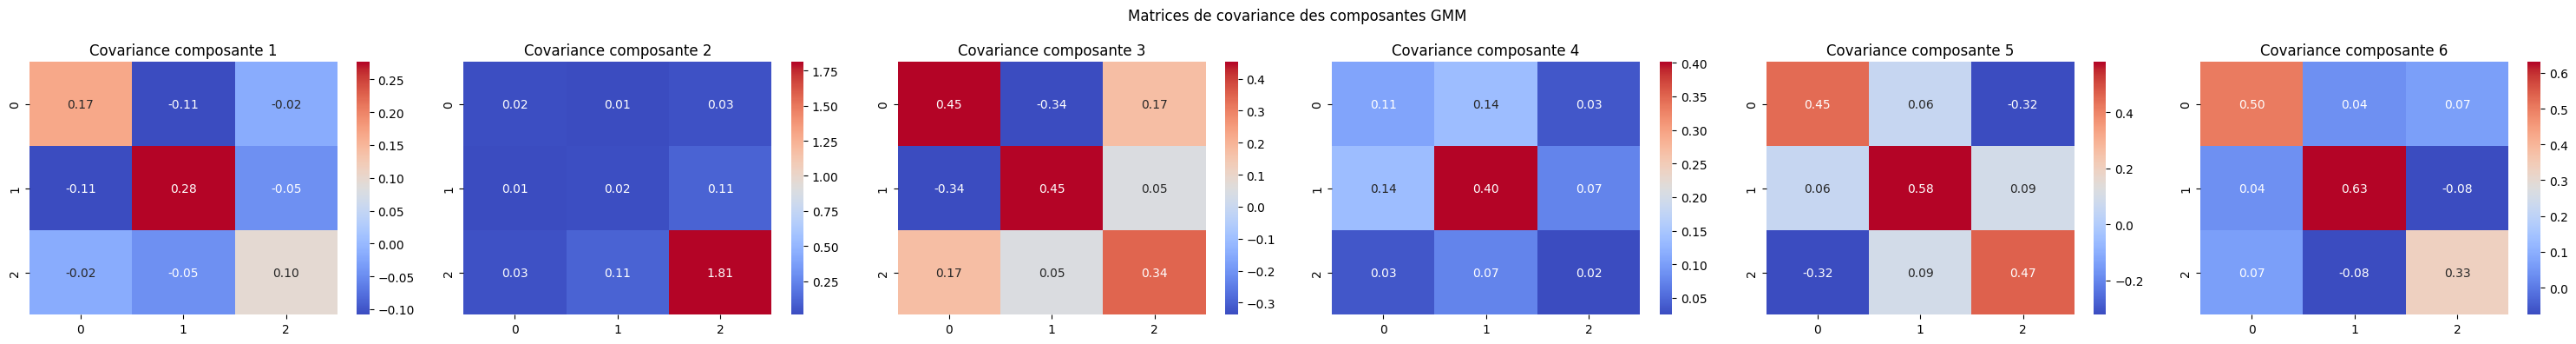

In [45]:
def plot_covariance_heatmaps(gmm):
    n_components = gmm.n_components
    fig, axs = plt.subplots(1, n_components, figsize=(5 * n_components, 4))
    
    if n_components == 1:
        axs = [axs]
    
    for idx, cov in enumerate(gmm.covariances_):
        sns.heatmap(cov, annot=True, fmt=".2f", cmap="coolwarm", ax=axs[idx])
        axs[idx].set_title(f"Covariance composante {idx+1}")
    
    plt.suptitle("Matrices de covariance des composantes GMM")
    plt.tight_layout()
    plt.show()

# Exemple d'utilisation avec le GMM optimal trouvé précédemment (par exemple gmm_optimal)
plt.figsize=(10, 8)
plot_covariance_heatmaps(gmm_optimal)

Description des clusters

Résumé descriptif par cluster :


Valeur relevée (V/m)                           X             \
                           count      mean       std   count       mean   
GMM Cluster                                                               
0                         149804  0.338512  0.187400  149804  47.220806   
1                         140808  1.655304  0.942466  140808  47.206830   
2                         208744  0.977004  0.393510  208744  47.220577   
3                          36154  0.338748  0.108970   36154  47.156030   
4                          80562  0.653809  0.462144   80562  47.276495   
5                         124183  0.977681  0.389594  124183  47.190135   

                            Y                     GMM Cluster            
                  std   count      mean       std       count mean  std  
GMM Cluster                                                              
0            0.012596  149804 -1.545062  0.034951      149804  0.0  0.0  
1            0.004532  140808 -1.574279  0.009232      140808  1.0  0.0  
2            0.021529  208744 -1.579694  0.046478      208744  2.0  0.0  
3            0.010332   36154 -1.516392  0.043554       36154  3.0  0.0  
4            0.020418   80562 -1.486483  0.050167       80562  4.0  0.0  
5            0.021754  124183 -1.677249  0.049571      124183  5.0  0.0

C:\Users\marec\AppData\Local\Temp\ipykernel_12560\1924854532.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts.values, palette='viridis')


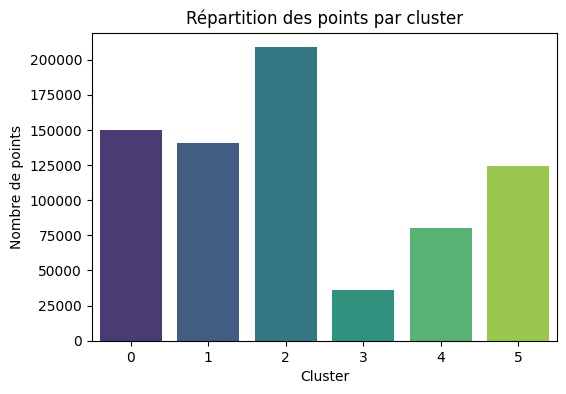

Valeur relevée (V/m)                           X             \
                           count      mean       std   count       mean   
GMM Cluster                                                               
0                         149804  0.338512  0.187400  149804  47.220806   
1                         140808  1.655304  0.942466  140808  47.206830   
2                         208744  0.977004  0.393510  208744  47.220577   
3                          36154  0.338748  0.108970   36154  47.156030   
4                          80562  0.653809  0.462144   80562  47.276495   
5                         124183  0.977681  0.389594  124183  47.190135   

                            Y                     GMM Cluster            
                  std   count      mean       std       count mean  std  
GMM Cluster                                                              
0            0.012596  149804 -1.545062  0.034951      149804  0.0  0.0  
1            0.004532  140808 -1.574279  0.009232      140808  1.0  0.0  
2            0.021529  208744 -1.579694  0.046478      208744  2.0  0.0  
3            0.010332   36154 -1.516392  0.043554       36154  3.0  0.0  
4            0.020418   80562 -1.486483  0.050167       80562  4.0  0.0  
5            0.021754  124183 -1.677249  0.049571      124183  5.0  0.0

In [46]:
def cluster_summary(df, labels, cluster_name="Cluster"):
    # Ajout des labels au DataFrame
    df_cluster = df.copy()
    df_cluster[cluster_name] = labels
    
    numeric_cols = df_cluster.select_dtypes(include=["number"])  # Select numeric columns only
    summary = numeric_cols.groupby(df_cluster[cluster_name]).agg(['count', 'mean', 'std'])

    print("Résumé descriptif par cluster :")
    display(summary)
    
    # Optionnel : visualiser la répartition des clusters
    counts = df_cluster[cluster_name].value_counts().sort_index()
    plt.figure(figsize=(6,4))
    sns.barplot(x=counts.index, y=counts.values, palette='viridis')
    plt.xlabel("Cluster")
    plt.ylabel("Nombre de points")
    plt.title("Répartition des points par cluster")
    plt.show()
    
    return summary

# Exemple d'utilisation
labels_optimal = gmm_optimal.predict(X_scaled)
cluster_summary(df, labels_optimal, cluster_name="GMM Cluster")